May: Attempt 1 - Previous idealized equations. For final bathymetry, refer to make_mackenzie.ipynb.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_canyon(along, cross, bathy):
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(1, 2, 1)
    p = ax1.pcolormesh(along, cross, bathy, cmap=cm.Spectral)
    fig.colorbar(p, ax=ax1)
    ax1.set_xlabel('Alongshore Distance')
    ax1.set_ylabel('Cross-shore Distance')

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    Along, Cross = np.meshgrid(along, cross)
    #ax2.plot_surface(X, Y, -1*H, cmap=cm.Spectral, linewidth=0, rstride=1, cstride=1, antialiased=False)
    ax2.plot_wireframe(Along, Cross, bathy, rstride=10, cstride=10)
    ax2.view_init(elev=30, azim=40)
    ax2.set_xlabel('Alongshore Distance')
    ax2.set_ylabel('Cross-shore Distance')
    ax2.set_zlabel('Depth')
    
    fig.subplots_adjust(wspace=0.01, hspace=None)

(Klinck, 1996; Kampf, 2007)
$$H(x,y) = H_D - \frac{1}{2} \big(H_D - H_S \big) \Bigg[ 1 - tanh \Big( \frac{y-y_0(x)}{y_c} \Big) \Bigg]$$

(Klinck, 1996)
$$y_0(x) = y_n + y_b \Bigg[ 1-e^{\frac{-(x^2 - x_0^2)}{2b^2}} \Bigg]$$

(Kampf, 2007)
$$y_0(x) = y_n + y_b \Bigg[ 1-\kappa e^{\frac{-(x - x_0)^2}{2b^2}} \Bigg]$$ 

* $H_D$ = maximum depth in domain
* $H_S$ = shelf depth
* $y_c$ = steepness of the continental slope
* $y_n$ = distance between head and coast
* $y_b$ = distance between head and shelf break
* $x_0$ = location of axis
* $b$ = canyon width

In [3]:
HD = 900/1000
HS = 80/1000
yn = 53688.918782184468/1000
yb = 86443.62324659928/1000
b = 55339.859052946638/1000
x0 = 155

yc_e = 0.033932095822522088 #steepness
yc_w = 0.015763602988544421
yc_e2 = 0.5 * (50000.0/1000) #half-width, east
yc_e3 = 0.5 * (44500.0/1000)
yc_w2 = 0.5 * (24596.7477525/1000) # half-width, west
yc_avg = 0.5 * (yc_e2 + yc_w2)

In [4]:
x = np.arange(0, 310, dtype=np.float)
y = np.arange(0, 310, dtype=np.float)
y0 = np.zeros((len(y),len(x)))
bathy1 = np.zeros((len(y),len(x)))
yc = yc_avg

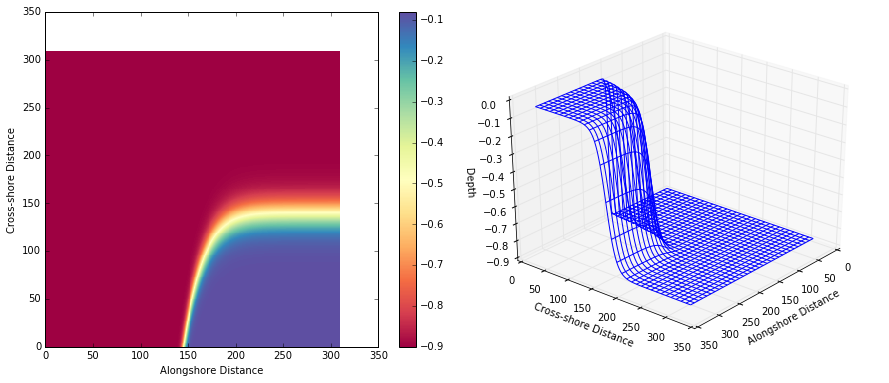

In [5]:
# Klinck, 1996 
for j in range(len(y)):
    for i in range(len(x)):
        y0[j,i] = yn+(yb*(1-np.exp((-1*(x[i]**2-x0**2))/(2*(b**2)))))
        bathy1[j,i] = HD-0.5*(HD-HS)*(1-np.tanh((y[j]-y0[j,i])/yc))

plot_canyon(x, y, -1*bathy1)

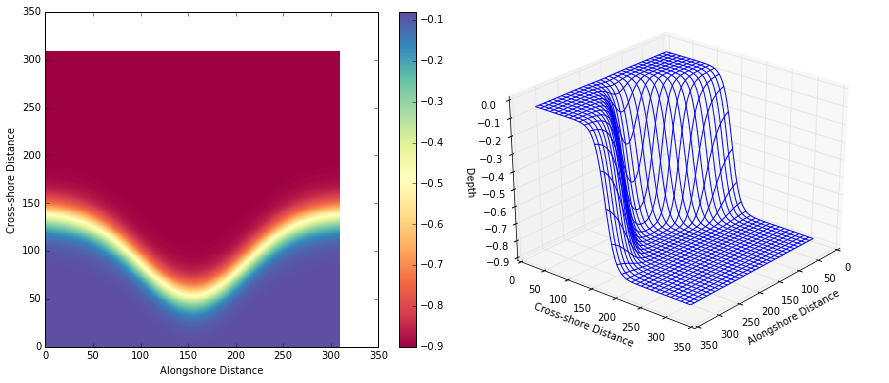

In [6]:
# Kampf, 2007
bathy2 = np.zeros((len(y),len(x)))
for j in range(len(y)):
    for i in range(len(x)):
        y0[j,i] = yn+(yb*(1-np.exp((-1*(x[i]-x0)**2)/(2*(b**2)))))
        bathy2[j,i] = HD-0.5*(HD-HS)*(1-np.tanh((y[j]-y0[j,i])/yc))

plot_canyon(x, y, -1*bathy2)

(Jordi et al, 2008)
$$H_S= 
\begin{cases}
    H_1-H_1\big(\frac{x-x_1}{x_1}\big)^3 & x\leq x_1\\
    H_1+\frac{1}{2}(H_2-H_1)\big[1+tanh\big(\frac{x-x_2}{L_1}\big) \big] & x > x_1
\end{cases}$$

$$H_C = H_S + max\big(0, H_3 \sqrt{\frac{x-x_3}{x_1-x_3}}-H_S\big)e^{\Big[-\Big(\frac{y-y_3}{L_2+\frac{\sqrt{x}}{L_3}}\Big)^2\Big]}$$

* $x_1$ = offshore shelf position
* $x_2$ = offshore slope position
* $x_3$ = offshore canyon position
* $x_3$ = alongshore canyon position
* $L_1$ = slope width scale
* $L_2$ = canyon length scale
* $L_3$ = canyon width scale
* $H_1$ = shelf depth
* $H_2$ = open ocean depth
* $H_3$ = canyon depth at mouth



In [7]:
# paper
x = np.arange(0, 200, dtype=np.float)
y = np.arange(20, 80, dtype=np.float)
x1 = 30
x2 = 35
x3 = 5
y3 = 50
L1 = 5
L2 = 2
L3 = 12
H1 = 200
H2 = 1000
H3 = 800

In [8]:
# Jordi, 2008
ind = np.where(x==x1)[0][0]
HS = np.zeros(len(x))

for lowerj in np.arange(0, ind+1):
    HS[lowerj] = H1 - (H1 * ((x[lowerj] - x1)/x1)**3)

for upperj in np.arange(ind+1, len(x)):
    HS[upperj] = H1 + (0.5 * (H2 - H1)) * (1 + np.tanh((x[upperj] - x2)/L1))
    
bathy3 = np.zeros((len(x),len(y)))
for j in range(len(x)):
    for i in range(len(y)):
        bathy3[j,i] = HS[j] + (np.nanmax((H3 * (np.sqrt((x[j] - x3)/(x1 - x3)))) - HS)) * np.exp(-1 * ((y[i] - y3)/(L2 + (np.sqrt(x[j])/L3)))**2)

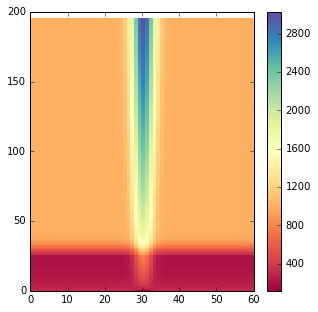

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
p = ax.pcolor(bathy3[5:,:], cmap=cm.Spectral)
fig.colorbar(p, ax=ax)

In [10]:
bathy3.shape

(200, 60)

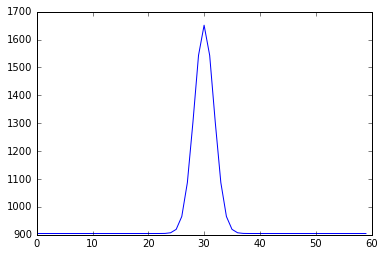

In [11]:
plt.plot(bathy3[40,:])

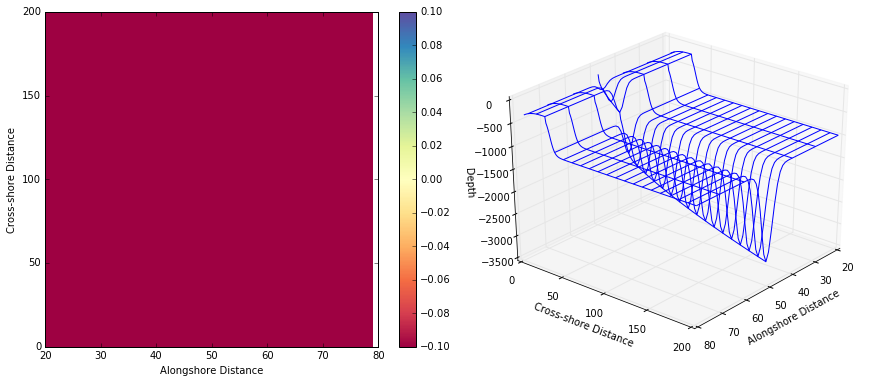

In [12]:
plot_canyon(y, x, -1*bathy3)

* $H_c$ = depth of coastal wall
* $H_{sb}$ = depth at shelf break
* $H_{oc}$ = maximum depth
* $y_{sl}$ = location of middle of slope
* $L_{sl}$ = half-width of slope
* $y_{sb}$ = offshore distance of shelf break
* $y_c$ location of the head
* $x_c$ = location of canyon axis
* $d_{can}$ = distance from free surface to bottom at the mouth
* $W_c$ = canyon width scale

(She and Klinck, 2000)
$$H_s(y) = H_c - \big(H_{sb}-H_c\big) min\big(\frac{y}{y_{sb}},1\big) + \frac{1}{2} \big(H_{oc} - H_{sb} \big) \Bigg[ 1 + tanh \Big( \frac{y-y_{sl}}{L_{sl}} \Big) \Bigg]$$

$$W(y) = W_c(0.5 + \frac{y}{L_y})$$

$$H_{can}(y) = max\big(0., -H_s(y)+d_{can} \sqrt{\frac{y-y_c}{y_{sb}-y_c}}\big)$$

$$H(x,y) = H_s(y) + H_{can}(y) e^{-\big(\frac{x - x_c}{2W(y)}\big)^2} $$ 

In [13]:
x = np.arange(-40, 40, dtype=np.float)
y = np.arange(0, 80, dtype=np.float)
Hc = 50/1000
Hsb = 150/1000
ysb = 30
Hoc = 1000/1000
dcan = 600/1000
ysl = 50
Lsl = 5
Wc = 2
yc = 15
xc = 0
Ly = max(y) #***?

In [14]:
Hs = np.zeros(len(y))
W = np.zeros(len(y))
Hcan = np.zeros(len(y))
bathy4 = np.zeros((len(y),len(x)))

for j in range(len(y)):
    for i in range(len(x)):
        Hs[j] = Hc - ((Hsb - Hc) * np.nanmin(y[j] / ysb)) + (0.5 * (Hoc - Hsb) * (1 + np.tanh((y[j] - ysl) / Lsl)))
        W[j] = Wc * (0.5 + (y[j] / Ly))
        Hcan[j] = np.nanmax((-1 * Hs[j]) + (dcan * (np.sqrt((y[j] - yc)/(ysb - yc)))))
        bathy4[j,i] = Hs[j] + (Hcan[j] * np.exp(-1 * (((x[i] - xc) / (2 * W[j]))**2)))

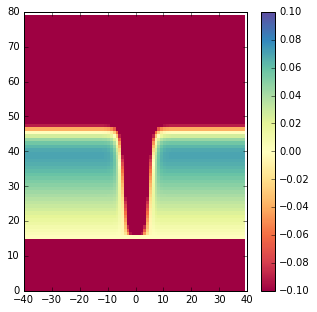

In [20]:
along = x
cross = y
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
p = ax1.pcolormesh(along, cross, -1*bathy4, cmap=cm.Spectral)
fig.colorbar(p, ax=ax1)

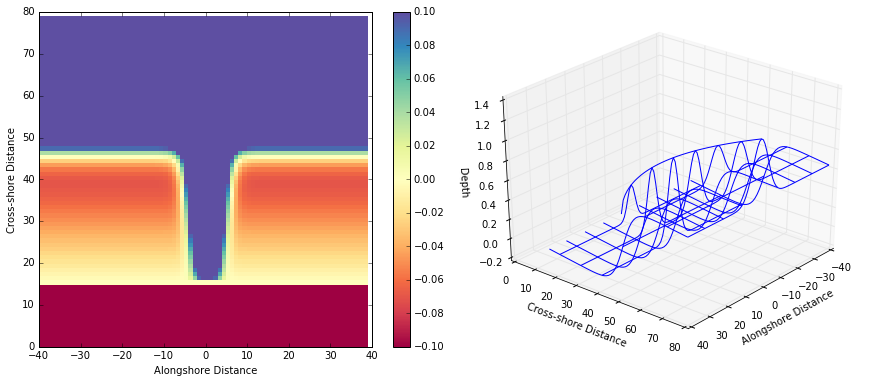

In [23]:
plot_canyon(x, y, bathy4)

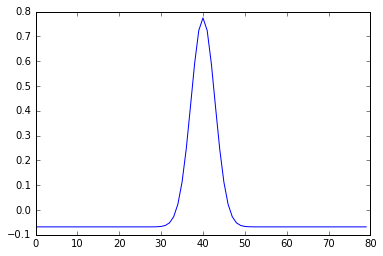

In [17]:
plt.plot(bathy4[40,:])

$H_s$ is the continental shelf depth away from the canyon. $W$ specifies the triangular shape of the canyon's width. $H_{can}$ is the depth of the canyon along its axis relative to the surrounding shelf.

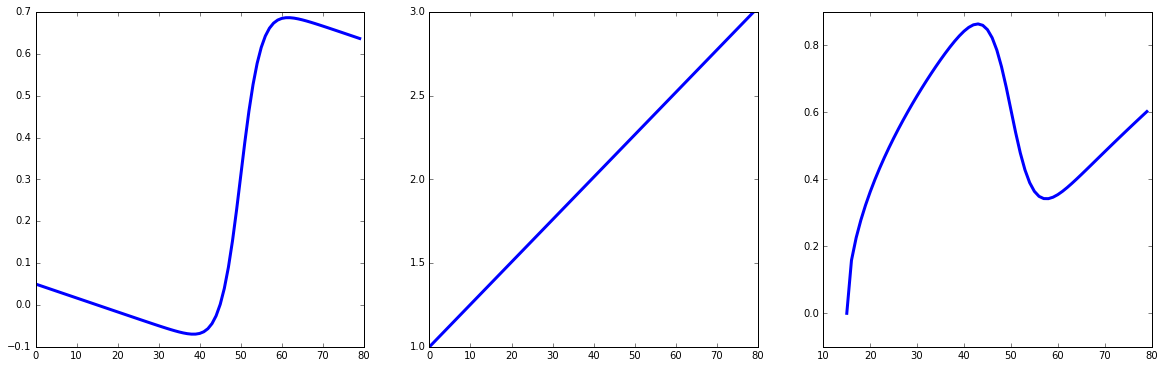

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(y, Hs, linewidth=3); ax2.plot(y, W, linewidth=3); ax3.plot(y, Hcan, linewidth=3) #cross-shore direction

Yes, you don't want an infinite incision.  You could use something 
like 0.5*(1-tanh((y-y0)/length) multiplied against the incision term: 
where y is distance along the canyon axis, y0 is where the incision 
should "end" and length is the smearing of that end.

$$H_s(y) = H_c - \big(H_{sb}-H_c\big) min\big(\frac{y}{y_{sb}},1\big) + \frac{1}{2} \big(H_{oc} - H_{sb} \big) \Bigg[ 1 + tanh \Big( \frac{y-y_{sl}}{L_{sl}} \Big) \Bigg]$$

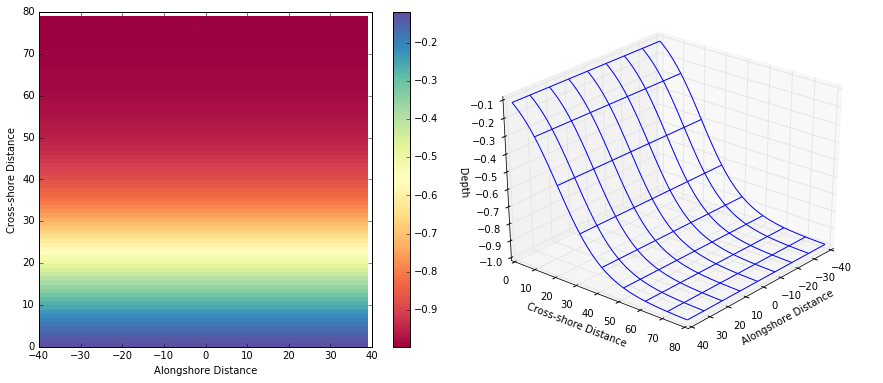

In [19]:
x = np.arange(-40, 40, dtype=np.float)
y = np.arange(0, 80, dtype=np.float)
test = np.zeros((len(y),len(x)))

for j in range(len(y)):
    for i in range(len(x)):
        test[j,i] = 0.5 * (1 + np.tanh((y[j] - 20) / 20))

plot_canyon(x, y, -1*test)